# Final Project

# Big Mart Sales Prediction

### We will be following the list of content given below:
 1. Problem Statement <br>
 2. Hypothesis Generation <br>
 3. Loading Packages and Data <br>
 4. Data Structure and Content <br>
 5. Exploratory Data Analysis <br>
 6. Univariate Analysis <br>
 7. Bivariate Analysis <br>
 8. Missing Value Treatment <br>
 9. Feature Engineering <br>
 10. Encoding Categorical Variables <br>
 11. Label Encoding <br>
 12. One Hot Encoding <br>
 13. PreProcessing Data <br>
 14. Modeling <br>
 15. Linear Regression <br>
 16. Regularized Linear Regression <br>
 17. RandomForest <br>
 18. XGBoost <br>
 19. Summary

---

## 1. <ins> Problem Statement</ins>:
### The data scientists at `BigMart` have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
### Using this model, `BigMart` will try to understand the properties of products and stores which play a key role in increasing sales.

## 1.1 The Data
### We have two csv files, one is train (8523) and  second is test (5681) data sets consisting of 12 features, train data set has both input and output variable. We need to predict the sales for test data set.

| Variable | Description |
| :---     | :---        |
| `Item_Identifier` | Unique product ID |
| `Item_Weight` | Weight of product |
| `Item_Fat_Content` | Whether the product is low fat or not |
| `Item_Visibility` | The % of total display area of all products in a store allocated to the particular product |
| `Item_Type` | The category to which the product belongs |
| `Item_MRP` | Maximum Retail Price (list price) of the product |
| `Outlet_Identifier` | Unique store ID |
| `Outlet_Establishment_Year` | The year in which store was established |
| `Outlet_Size` | The size of the store in terms of ground area covered |
| `Outlet_Location_Type` | The type of city in which the store is located |
| `Outlet_Type` | Whether the outlet is just a grocery store or some sort of supermarket |
| `Item_Outlet_Sales` | Sales of the product in the particulat store. This is the outcome variable to be predicted |

---

## 2. <ins> Hypothesis Generation</ins>:

### Store Level Hypotheses:

 1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
 2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
 3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.
 4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
 5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
 6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
 7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
 8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

 1. Brand: Branded products should have higher sales because of higher trust in the customer.
 2. Packaging: Products with good packaging can attract customers and sell more.
 3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
 4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
 5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
 6. Advertising: Better advertising of products in the store will should higher sales in most cases.
 7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.
 
 
| Variable | Relation to hypotheses |
| :---                      | :---  |
| `Item_Identifier` | ID variable |
| `Item_Weight` | Not considered in any hypothesis |
| `Item_Fat_Content` | Linked to 'utility' hypothesis. Low fat items are generally used more than others |
| `Item_Visibility` | Linked to 'Displat Area' hypothesis |
| `Item_Type` | More inferences about 'Utility' can be derived from this |
| `Item_MRP` | Not considered in any hypothesis |
| `Outlet_Identifier` | ID variable |
| `Outlet_Establishment_Year` | Not considered in any hypothesis |
| `Outlet_Size` | Linked to 'Store Capacity' hypothesis |
| `Outlet_Location_Type` | Linked to 'City Type' hypothesis |
| `Outlet_Type` | Linked to 'Store Capacity' hypothesis |
| `Item_Outlet_Sales` | Outcome or target variable |

---

## 3. <ins>Loading Packages and Data</ins>:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('Datasets/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test = pd.read_csv('Datasets/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### It is generally a good idea to combine both train and test data sets into one to perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. 
#### Let's combine them into a dataframe `df` with a `source` column specifying where each observation belongs.

In [4]:
train['source'] = 'train'
test['source'] = 'test'

# Combining both the data sets.
df = pd.concat([train, test], ignore_index = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


---

## 4. <ins>Data Structure and Content</ins>:

In [5]:
print ('The shape of train data:', train.shape)
print ('The shape of test data:', test.shape)
print ('The shape of concatenated dataset df:', df.shape)

The shape of train data: (8523, 13)
The shape of test data: (5681, 12)
The shape of concatenated dataset df: (14204, 13)


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

---

## 5. <ins>Exploratory Data Analysis</ins>:

In [7]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
# Checking for missing values, if any.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

#### From the analysis above, we have the following information:

 - `Item_Weight` has 2439 (17.2%) missing values.
 
 - `Outlet_Size` has 4016 (28.3%) missing values.
 
 - The `Item_Outlet_Sales` is the target variable and missing values are ones in the test set. So, we need not worry about it. But, we’ll impute the missing values in `Item_Weight` and `Outlet_Size`.

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Some observations:

- The lower ‘count’ of `Item_Weight` shows the presence of missing values.

- `Item_Visibility` has a min value of 0. It makes no practical sense as because when a product is being sold in a store, the visibility cannot be 0.

- `Item_MRP` has Q3 (third quartile) as 185.86 and maxiumum value as 266.89 which may indicate that there is a presence of outliers.

- `Outlet_Establishment_Years` vary from 1985 to 2009. If we can convert the years to how old the particular store is, it should have a better impact on sales.

- The lower ‘count’ of `Item_Outlet_Sales` shows the presence of missing values.

In [10]:
for column in df.columns:
    print('-------------',column,'-------------')
    print(df[column].value_counts(),'\n')

------------- Item_Identifier -------------
FDM22    10
NCH42    10
NCT18    10
FDX13    10
DRG37    10
         ..
FDM10     7
FDS22     7
FDM50     7
FDL50     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64 

------------- Item_Weight -------------
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64 

------------- Item_Fat_Content -------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

------------- Item_Visibility -------------
0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64 

------------- Item_Type -------------
Fruits and Vegetables    2013
Snack Foods              1

#### There are typos and difference in representation in categories of `Item_Fat_Content` variable. Some of ‘Low Fat’ values are mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

In [11]:
print ('Original Categories:')
print (df.Item_Fat_Content.value_counts())

print ('\nModified Categories:')
df.Item_Fat_Content = df.Item_Fat_Content.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
print (df.Item_Fat_Content.value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


#### Lets have a look at the number of unique values in each of them.

In [12]:
for column in df.columns:
    print(column,':', len(df[column].value_counts()))

Item_Identifier : 1559
Item_Weight : 415
Item_Fat_Content : 2
Item_Visibility : 13006
Item_Type : 16
Item_MRP : 8052
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493
source : 2


#### Some observations:

- There are total 1559 products but total IDs are 14204 which shows the presence of duplicate IDs. Hence, ID variable has duplicate values.

- `Item_Type` has 16 unique values.

- Big Mart has 10 outlets/stores.

- There are 3 types of outlets/stores on the basis of area covered which is represented by `Outlet_Size`.

- There are 3 types of locations for an outlet/store.

- There are 4 types of outlets/stores on the basis of store capacity which is represented by `Outlet_Type`.

In [13]:
# Checking for duplicates.
unique_ids = len(set(df.Item_Identifier))
total_ids = df.shape[0]
duplicate_ids = total_ids - unique_ids
print('There are', duplicate_ids, 'duplicate IDs for', total_ids, 'total entries.')

There are 12645 duplicate IDs for 14204 total entries.


In [14]:
# Filtering categorical variables.
categorical_columns = [x for x in df.dtypes.index if (df.dtypes[x] == 'object') and x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Type
S

### Let's seperate the numerical variables and categorical variables for further analysis.
#### 1. Numerical Features:

In [15]:
numerical_features = df.select_dtypes(include = [np.number])
numerical_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 2. Categorical Features:

In [16]:
categorical_features = df.select_dtypes(include = [np.object])
categorical_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
source                  object
dtype: object

#### Pairplot

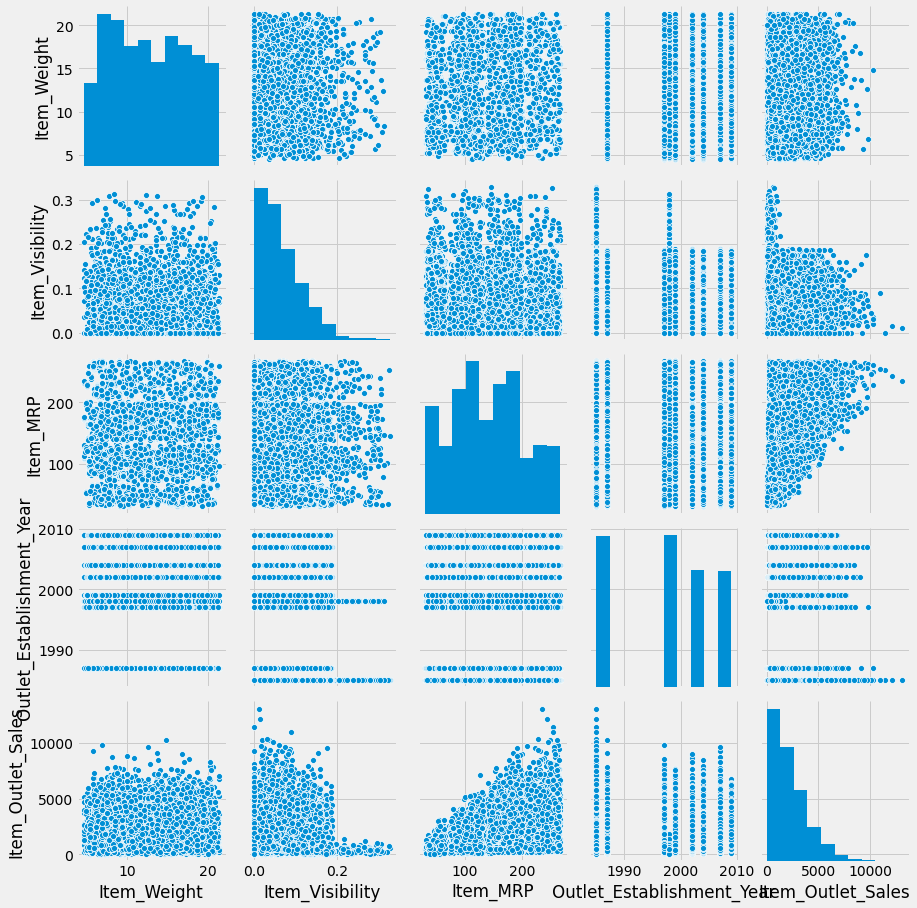

In [17]:
plt.style.use('fivethirtyeight')
sns.pairplot(df);

#### Correlation matrix for numerical variables.

In [18]:
numerical_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


#### Correlation heatmap for numerical variables.

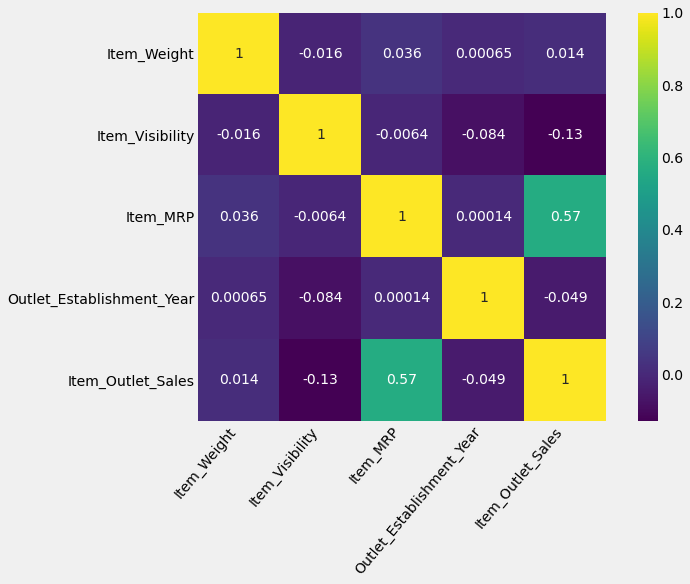

In [19]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.xticks(rotation = 50, ha = 'right');

- `Item_Weight` has almost negligible correlation (1.4%) with the target variable `Item_Outlet_Sales`.

- `Item_Visibility` is having nearly zero correlation (-13%) with the target variable. This means that the sales are not affected by visibility of item which is a contradiction to the general assumption of “more visibility thus, more sales”.

- `Item_MRP` is positively correlated with sales at an outlet, which indicates that the price quoted by an outlet plays an important factor in sales. Variation in MRP quoted by various outlets depends on their individual sales.

- Outlets situated in location with type tier 2 and medium size are also having high sales, which means that a one-stop-shopping-center situated in a town or city with populated area can have high sales.

---

## 6. <ins>Univariate Analysis</ins>:

### 6.1. Distribution of the target variable: `Item_Outlet_Sales`

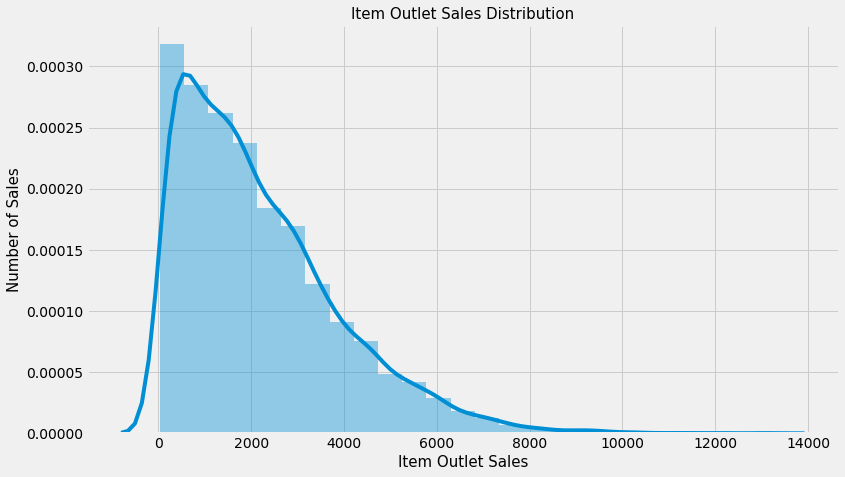

In [20]:
plt.figure(figsize = (12, 7))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.xlabel('Item Outlet Sales', fontsize = 15)
plt.ylabel('Number of Sales', fontsize = 15)
plt.title('Item Outlet Sales Distribution', fontsize = 15);

In [21]:
print ('Skewness:', df.Item_Outlet_Sales.skew())
print('Kurtosis:', df.Item_Outlet_Sales.kurt())

Skewness: 1.1775306028542798
Kurtosis: 1.6158766814287264


#### Skewness > 1 which indicates that the distribution of `Item_Outlet_Sales` is highly positively skewed whereas, kurtosis > 1 shows that the distribution is leptokurtic.

---

### 6.2. Distribution of the numerical variables.

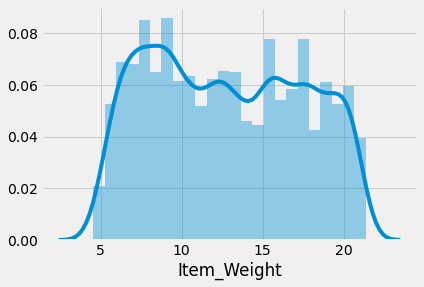

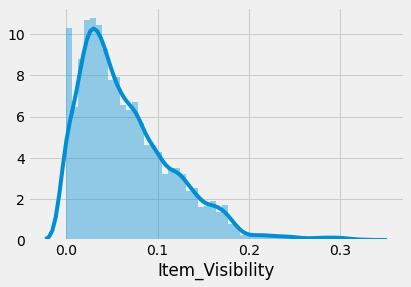

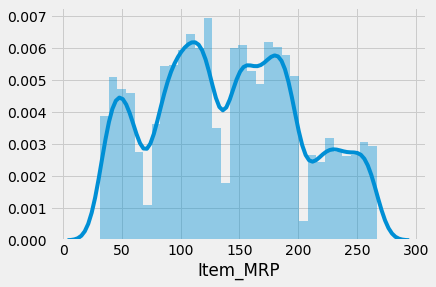

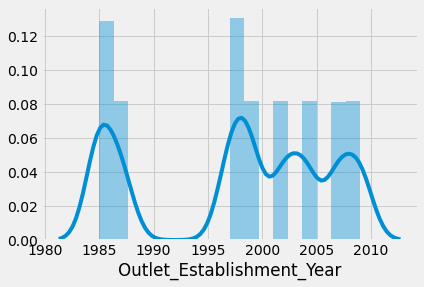

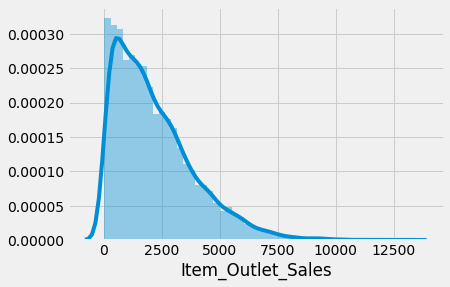

In [22]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show();

---

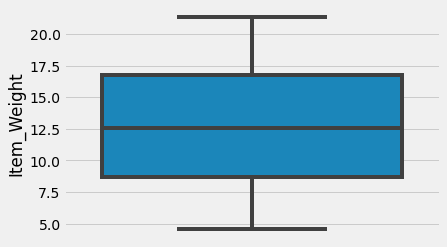

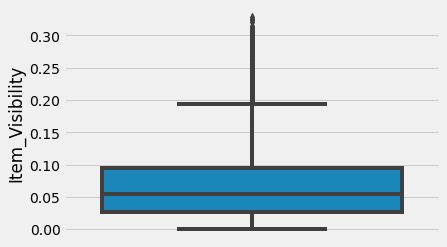

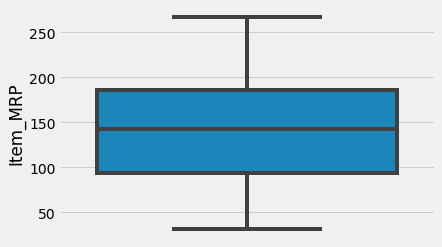

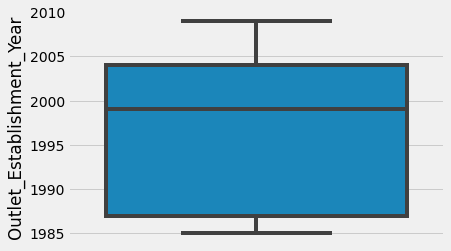

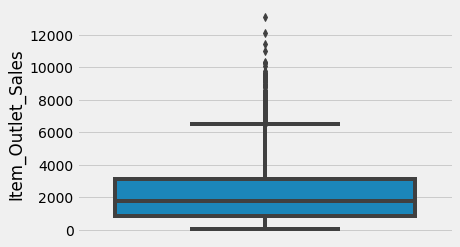

In [23]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna(), orient = 'v')
    plt.show();

---

#### 6.2.1 Distribution of the `Item_MRP`

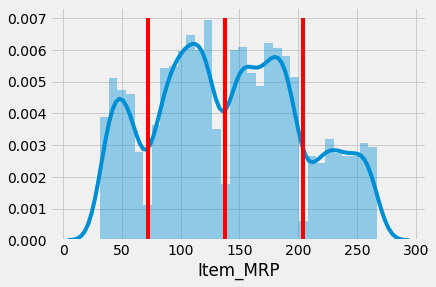

In [24]:
ax = sns.distplot(df['Item_MRP'])
x1, x2, x3 = 72, 138, 204
ax.plot([x1, x1], [0, 0.007], color = 'r')
ax.plot([x2, x2], [0, 0.007], color = 'r')
ax.plot([x3, x3], [0, 0.007], color = 'r')
plt.show();

#### The `Item_MRP` clearly shows that there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High' and  'Very High'.

---

## 6.3. Categorical Variables
#### 6.3.1. Distribution of the `Item_Fat_Content`

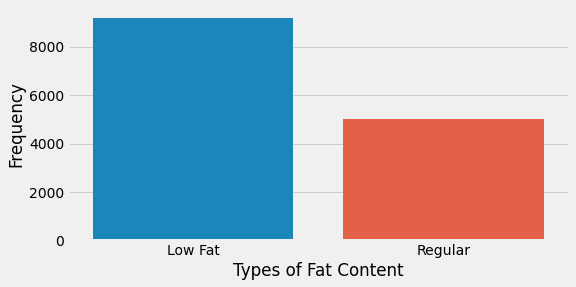

In [25]:
plt.figure(figsize  = (8, 4))
sns.countplot(df.Item_Fat_Content)
plt.xlabel('Types of Fat Content')
plt.ylabel('Frequency');

#### 6.3.2. Distribution of the `Item_Type`

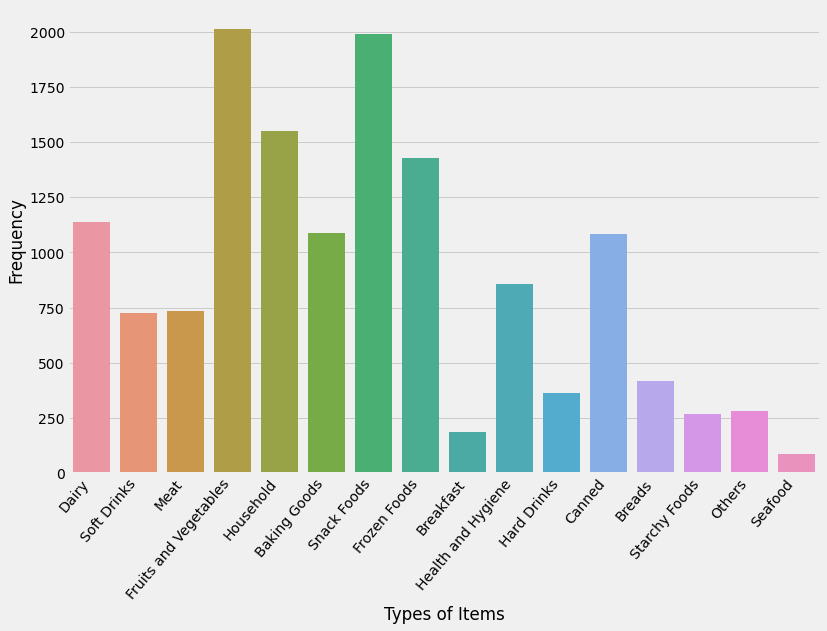

In [26]:
plt.figure(figsize  = (12, 8))
sns.countplot(df.Item_Type)
plt.xlabel('Types of Items')
plt.ylabel('Frequency')
plt.xticks(rotation = 50, ha = 'right');

#### 6.3.3. Distribution of the `Outlet_Size`

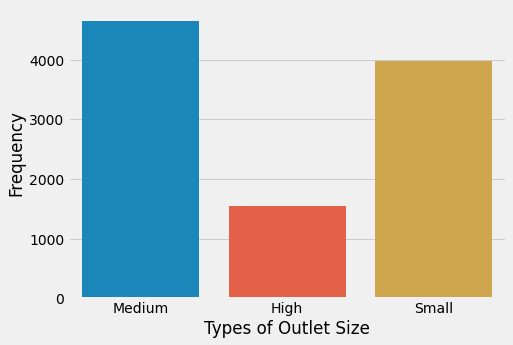

In [27]:
plt.figure(figsize  = (7, 5))
sns.countplot(df.Outlet_Size)
plt.xlabel('Types of Outlet Size')
plt.ylabel('Frequency');

#### 6.3.4. Distribution of the `Outlet_Location_Type`

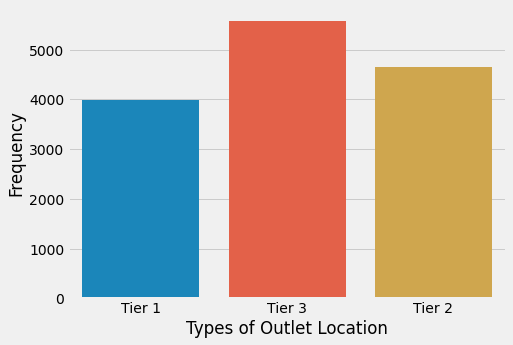

In [28]:
plt.figure(figsize  = (7, 5))
sns.countplot(df.Outlet_Location_Type)
plt.xlabel('Types of Outlet Location')
plt.ylabel('Frequency');

#### 6.3.5. Distribution of the `Outlet_Type`

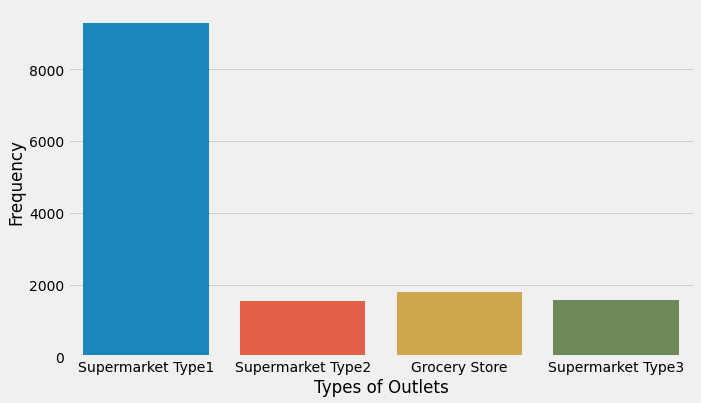

In [29]:
plt.figure(figsize  = (10, 6))
sns.countplot(df.Outlet_Type)
plt.xlabel('Types of Outlets')
plt.ylabel('Frequency');

---

## 7. <ins>Bivariate Analysis</ins>:
### 7.1. Numerical Variables
#### 7.1.1. `Item_Weight` and `Item_Outlet_Sales` Analysis

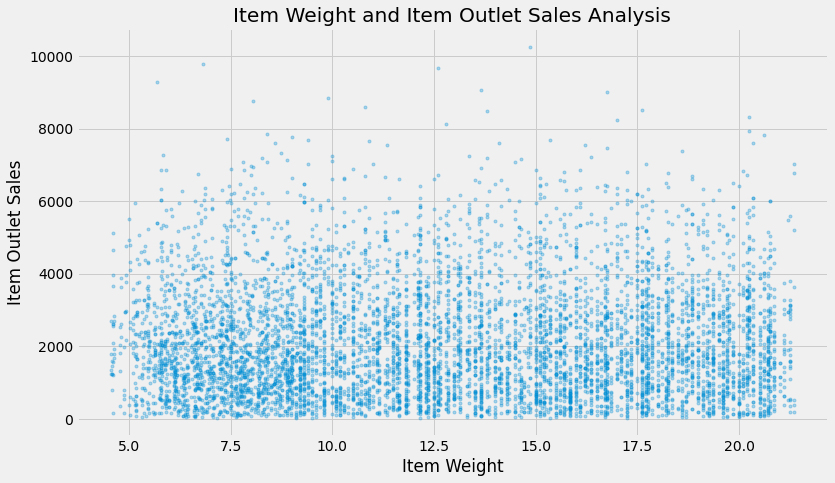

In [30]:
plt.figure(figsize = (12, 7))
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Item Weight and Item Outlet Sales Analysis')
plt.plot(df.Item_Weight, df.Item_Outlet_Sales, '.', alpha = 0.3);

- `Item_Outlet_Sales` is spread well across the entire range of the Item_Weight without any obvious pattern.

- `Item_Weight` is shown to have a low correlation with the target variable.

#### 7.1.2. `Item_Visibility` and `Item_Outlet_Sales` Analysis

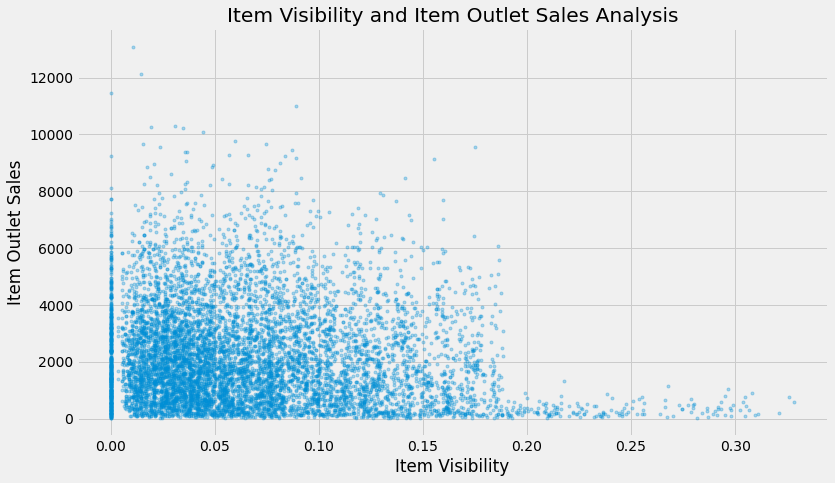

In [31]:
plt.figure(figsize = (12, 7))
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility and Item Outlet Sales Analysis')
plt.plot(df.Item_Visibility, df.Item_Outlet_Sales, '.', alpha = 0.3);

- Less visible items are sold more compared to more visibility items as outlet contains daily used items which contradicts the null hypothesis.

- There is a string of points at `Item_Visibility` = 0.0 which seems strange as item visibility cannot be completely zero.

#### 7.1.3. `Item_MRP` and `Item_Outlet_Sales` Analysis

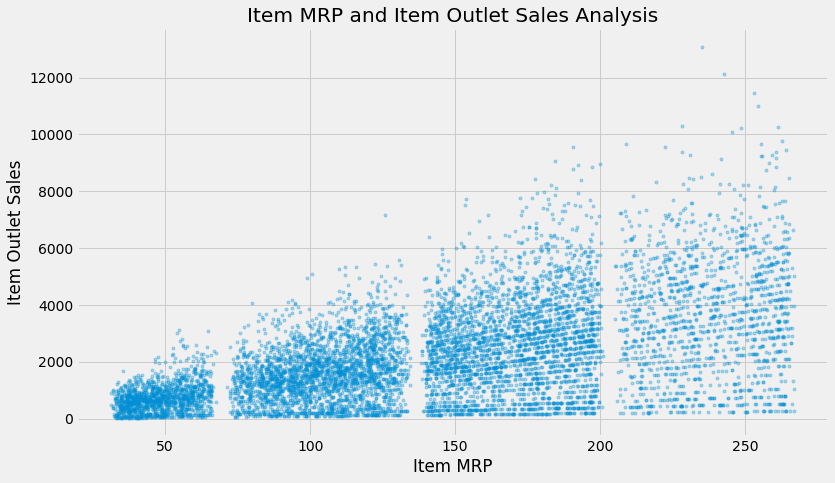

In [32]:
plt.figure(figsize = (12, 7))
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Item MRP and Item Outlet Sales Analysis')
plt.plot(train.Item_MRP, train.Item_Outlet_Sales, '.', alpha = 0.3);

- We can clearly see that there are four segments of prices.
- The price range of MRP 150 to 250 has the highest range of products available.

#### 7.1.4. `Outlet_Establishment_Year` and `Item_Outlet_Sales` Analysis

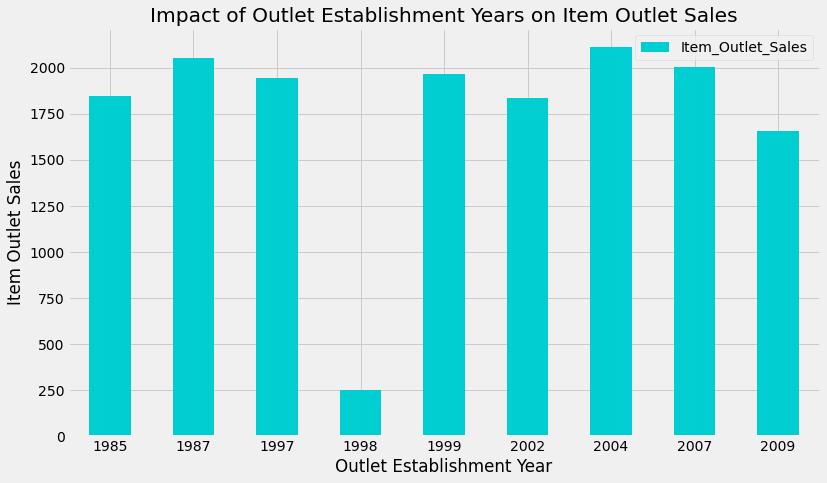

In [33]:
Outlet_Establish_Year_Sales = df.pivot_table(index = 'Outlet_Establishment_Year', values = 'Item_Outlet_Sales', 
                                             aggfunc = np.median)

Outlet_Establish_Year_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (12, 7))
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Establishment Years on Item Outlet Sales')
plt.xticks(rotation = 0);

Every new outlet established at that particular year, surprisingly, has great sales except for the year 1998.

---

### 7.2. Categorial Variables

#### 7.2.1. Impact of `Item_Identifier` on `Item_Outlet_Sales`

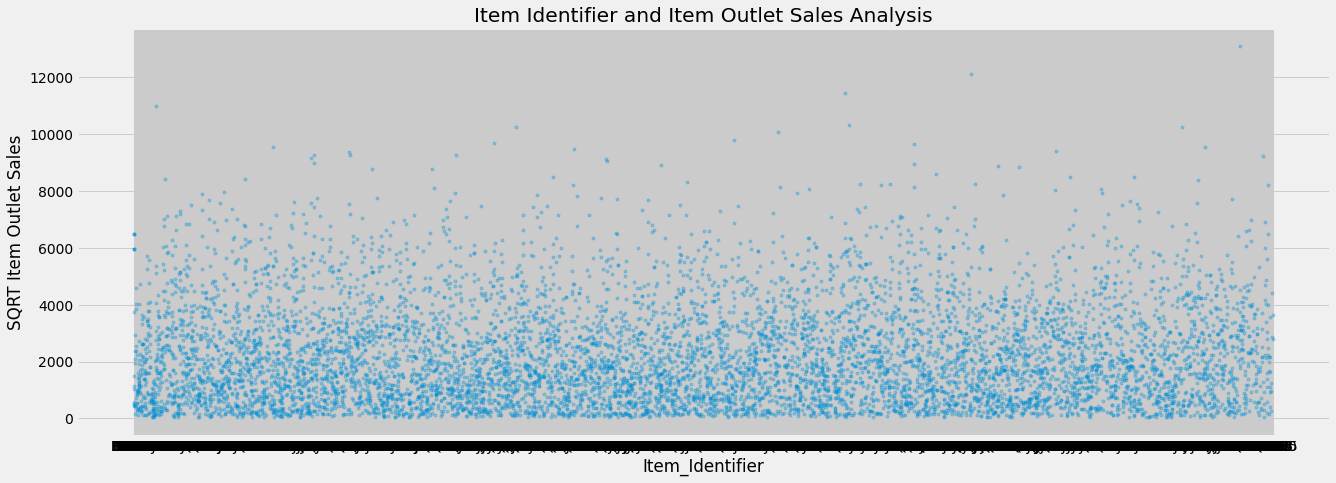

In [34]:
plt.figure(figsize = (20, 7))
plt.xlabel('Item_Identifier')
plt.ylabel('SQRT Item Outlet Sales')
plt.title('Item Identifier and Item Outlet Sales Analysis')
plt.plot(df.Item_Identifier, df.Item_Outlet_Sales, '.', alpha = 0.3);

#### 7.2.2. Impact of `Item_Fat_Content` on `Item_Outlet_Sales`

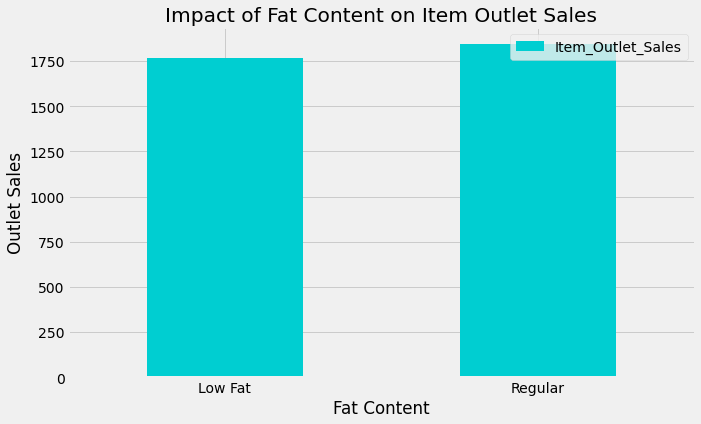

In [35]:
Item_Fat_Content_Sales = df.pivot_table(index = 'Item_Fat_Content', values = 'Item_Outlet_Sales', aggfunc = np.median)
Item_Fat_Content_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (10, 6))
plt.xlabel('Fat Content')
plt.ylabel('Outlet Sales')
plt.title('Impact of Fat Content on Item Outlet Sales')
plt.xticks(rotation = 0);

`Fat_Content` types has almost equal distribution on the sales.

#### 7.2.3. Impact of `Outlet_Identifier` on `Item_Outlet_Sales`

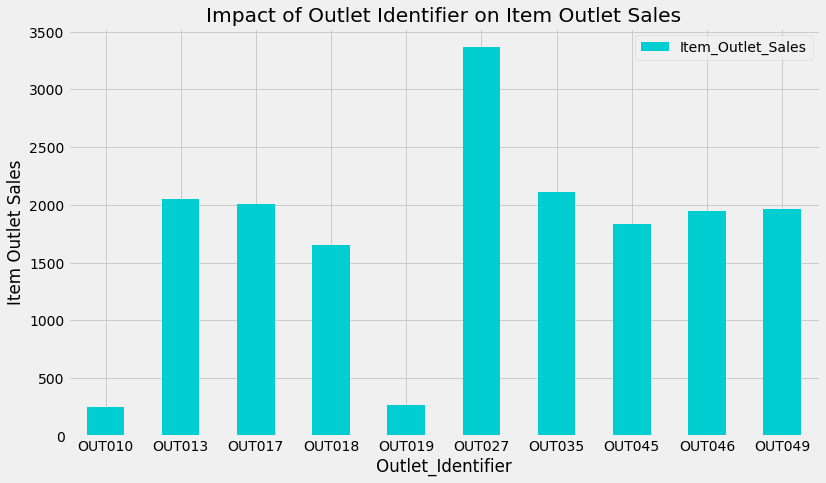

In [36]:
Outlet_Identifier_Sales = df.pivot_table(index = 'Outlet_Identifier', values = 'Item_Outlet_Sales', aggfunc = np.median)

Outlet_Identifier_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (12, 7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Identifier on Item Outlet Sales')
plt.xticks(rotation = 0);

- The average sales are around 2000.
- ‘OUT027’ has the highest sales.
- ‘OUT010’ and ‘OUT019’ has a quite similar distribution depicting very smaller number of sales.

#### 7.2.4. Impact of `Outlet_Size` on `Item_Outlet_Sales`

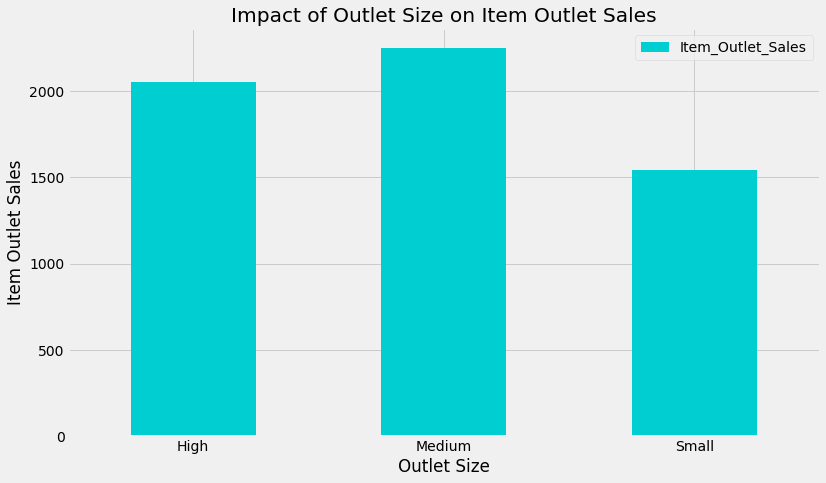

In [37]:
Outlet_Size_Sales = df.pivot_table(index = 'Outlet_Size', values = 'Item_Outlet_Sales', aggfunc = np.median)

Outlet_Size_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (12, 7))
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Size on Item Outlet Sales')
plt.xticks(rotation = 0);

There is a very little difference between the sales of different outlets on the basis of the size of outlet i.e. the distribution is almost identical.

#### 7.2.5. Impact of `Outlet_Location_Type` on `Item_Outlet_Sales`

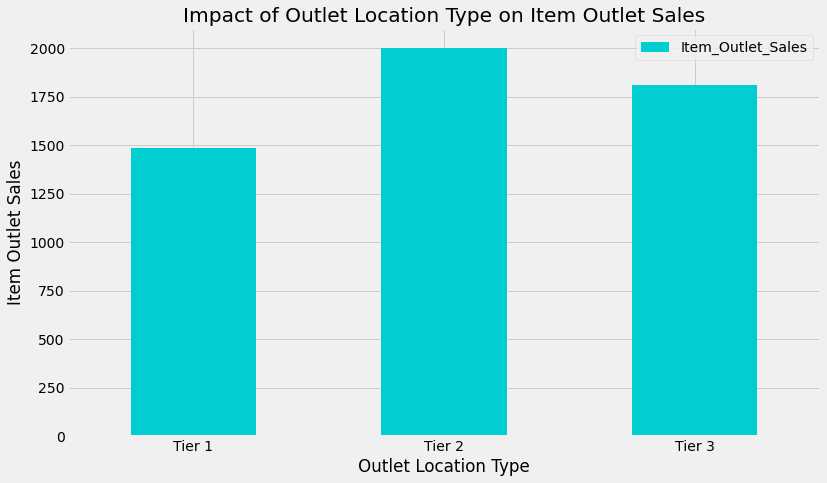

In [38]:
Outlet_Location_Type_Sales = df.pivot_table(index = 'Outlet_Location_Type', values = 'Item_Outlet_Sales', aggfunc = np.median)

Outlet_Location_Type_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (12, 7))
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Location Type on Item Outlet Sales')
plt.xticks(rotation = 0);

There is a very little difference between the sales of different outlets on the basis of the location of the outlet.

#### 7.2.6. Impact of `Outlet_Type` on `Item_Outlet_Sales`

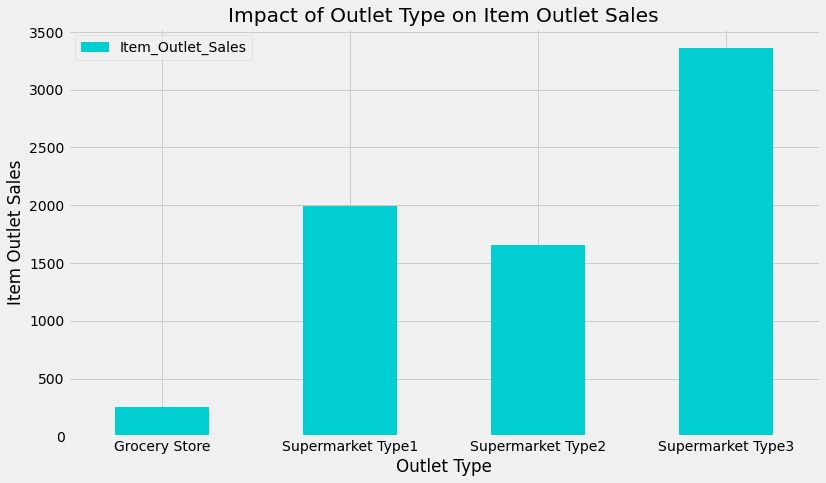

In [39]:
Outlet_Type_Sales = df.pivot_table(index = 'Outlet_Type', values = 'Item_Outlet_Sales', aggfunc = np.median)

Outlet_Type_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (12, 7))
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Outlet Type on Item Outlet Sales')
plt.xticks(rotation = 0);

- Grocery Store has most of its data points around the lower sales values as compared to the other categories. Hence, we can say that it has the least sales.
- There is a very little difference between the sales of both Supermarkets Type 1 and Type 2, respectively.
- Supermarket Type 3 has the highest sales contribution in the organization.

#### 7.2.7. Impact of `Item_Type` on `Item_Outlet_Sales`

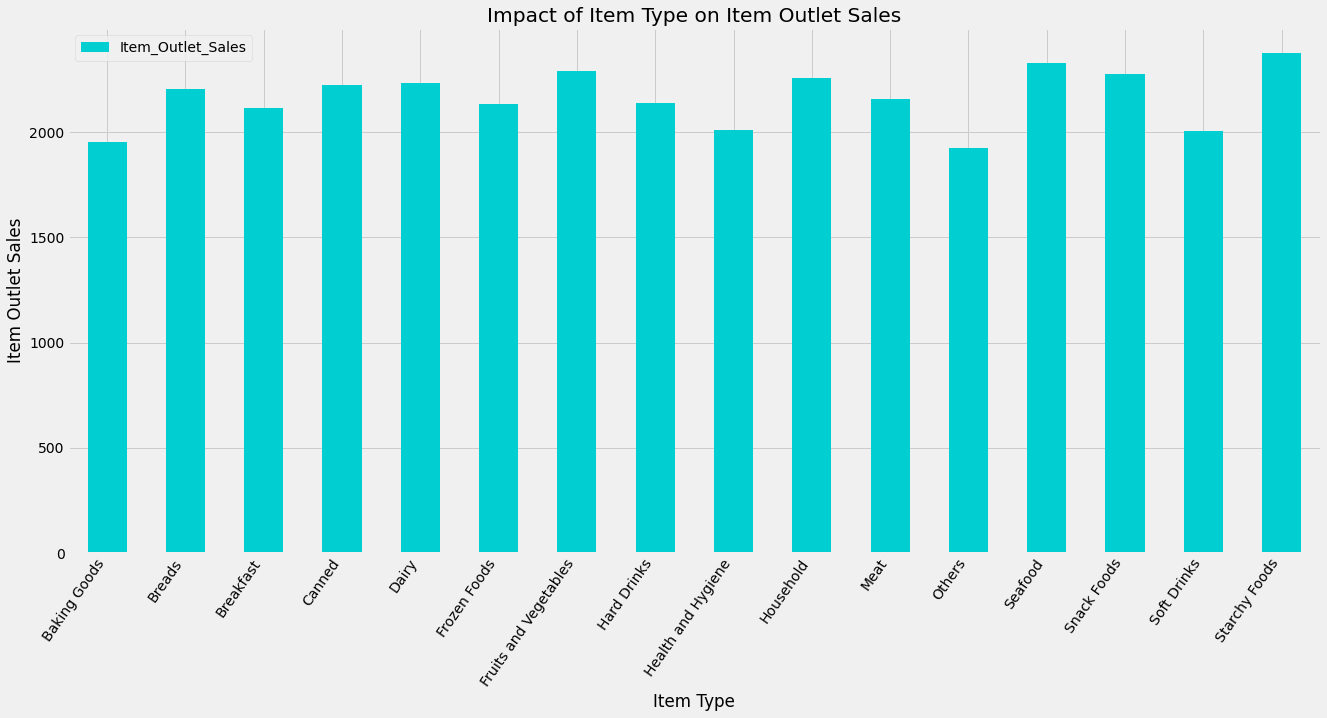

In [40]:
Item_Type_Sales = df.pivot_table(index = 'Item_Type', values = 'Item_Outlet_Sales', aggfunc = np.mean)

Item_Type_Sales.plot(kind = 'bar', color = 'darkturquoise', figsize = (20, 9))
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Impact of Item Type on Item Outlet Sales')
plt.xticks(rotation = 55, ha = 'right');

Distribution of `Item_Outlet_Sales` across the categories of `Item_Type` is not very distinct.

#### 7.2.8. Relation between `Item_Type` and `Item_Visibility`

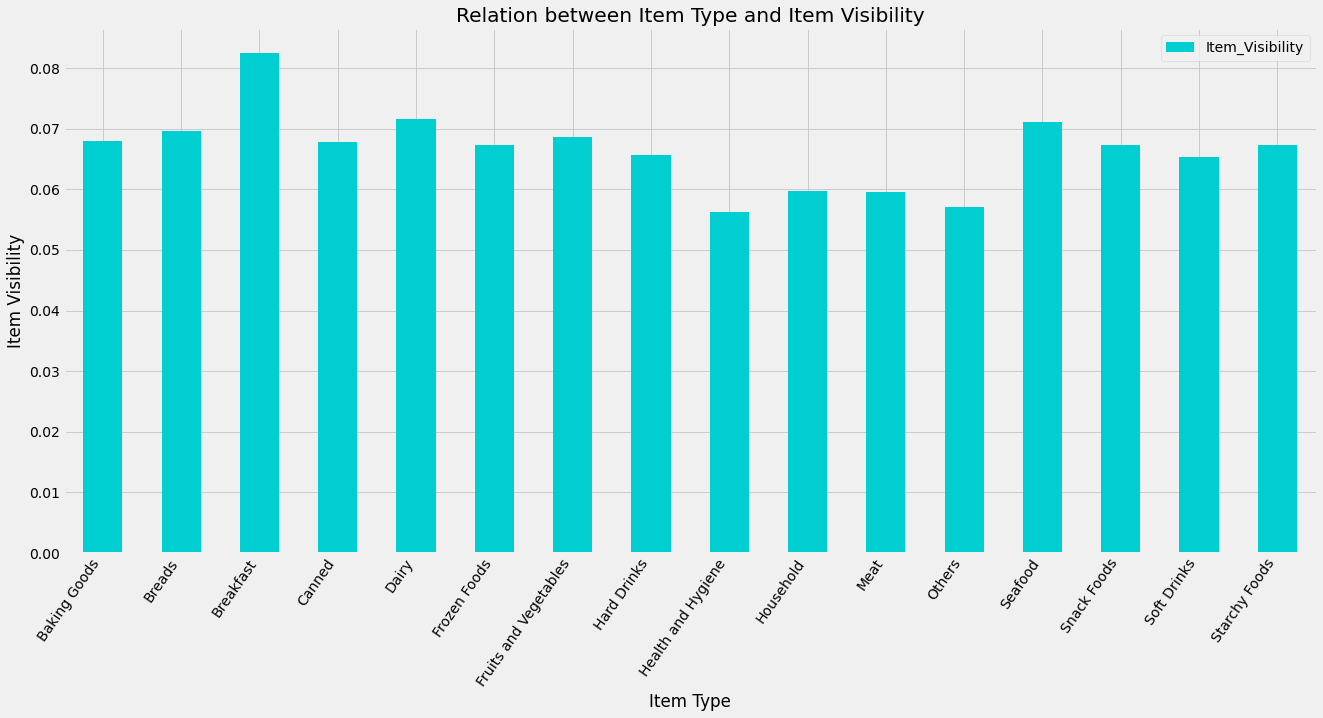

In [41]:
Item_Type_Visible = df.pivot_table(index = 'Item_Type', values = 'Item_Visibility', aggfunc = np.mean)

Item_Type_Visible.plot(kind = 'bar', color = 'darkturquoise', figsize = (20, 9))
plt.xlabel('Item Type')
plt.ylabel('Item Visibility')
plt.title('Relation between Item Type and Item Visibility')
plt.xticks(rotation = 55, ha = 'right');

---

## 8. <ins>Missing Value Treatment</ins>:
### Data Cleaning and Imputing Missing Values.

#### Let's impute `Item_Weight` by the average weight of that particular item.

In [42]:
# Determining the average weight per item.
item_avg_weight = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

# Getting a boolean variable specifying missing Item_Weight values.
miss_bool = df['Item_Weight'].isnull() 

# Imputing data and checking missing values before and after imputation to confirm.
print ('Total number of orignal missing values:', sum(miss_bool))

df.loc[miss_bool, 'Item_Weight'] = df.loc[miss_bool, 'Item_Identifier'].apply(lambda x: item_avg_weight.at[x, 'Item_Weight'])
print ('Total number of final missing values:', sum(df['Item_Weight'].isnull()))

Total number of orignal missing values: 2439
Total number of final missing values: 0


#### Let's impute `Outlet_Size` with the mode of the `Outlet_Size` for that particular type of outlet.

In [43]:
# Determining the mode.
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: mode(x).mode[0]))
print ('Mode for each Outlet_Type:', outlet_size_mode)

# Getting a boolean variable specifying missing Item_Weight values.
miss_bool = df['Outlet_Size'].isnull() 

# Imputing data and checking missing values before and after imputation to confirm.
print ('\nTotal number of orignal missing values:', sum(miss_bool))

df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type: Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Total number of orignal missing values: 4016
0


---

## 9. <ins>Feature Engineering</ins>:

### Modify `Item_Visibility`

The minimum value is 0 which makes no practical sense. Let's consider it like missing information and impute it with mean of that product.

In [44]:
# Determining average visibility of a product.
visibility_avg = df.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

# Imputing 0 values with mean visibility of that product:
miss_bool = (df['Item_Visibility'] == 0)

print ('Total number of 0 values initially:', sum(miss_bool))
df.loc[miss_bool, 'Item_Visibility'] = df.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Total number of 0 values after modification:', sum(df['Item_Visibility'] == 0))

Total number of 0 values initially: 879
Total number of 0 values after modification: 0


Earlier, we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the `visibility_avg` variable made above to achieve this.

In [45]:
# Determining another variable with means ratio
df['Item_Visibility_MeanRatio'] = df.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis = 1)
print (df['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


### Modify `Item_Type`

In [46]:
len(df.Item_Type.unique())

16

#### The `Item_Type` variable has 16 unique categories which might prove to be very useful in analysis. So, it is a good idea to combine them. 
#### One way could be to manually assign a new category to each. But, if we look at the `Item_Identifier`, i.e. the unique ID of each item, it starts with either `FD`, `DR` or `NC`. If we see the categories, these look like being Food, Drinks and Non-Consumables.

In [47]:
# Getting the first two characters of ID.
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0: 2])

# Renaming them to more intuitive categories.
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### There are some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [48]:
df.loc[df['Item_Type_Combined'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Determine the years of operation of a store.

In [49]:
# Subtracting from 2013 as data is collected in 2013.
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

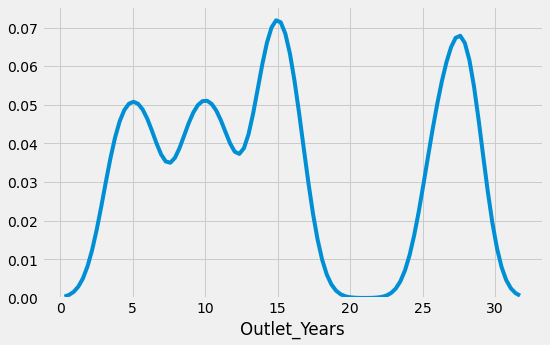

In [50]:
plt.figure(figsize = (8, 5))
sns.distplot(df.Outlet_Years, bins = 6, hist = False);

#### Hence, as we can see, stores are 4 - 28 years old.

---

## 10. <ins>Encoding Categorical Variables</ins>:

#### Since, `scikit-learn` accepts only numerical variables, we need to convert all categories of nominal variables into numeric type variables. I have created a new variable `Outlet` same as `Outlet_Identifier` but encoded that.

In [51]:
le = LabelEncoder()

df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

---

## 11. <ins>Encoding Categorical Variables</ins> & 12. <ins>One Hot Encoding</ins>

In [52]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                                   'Item_Type_Combined', 'Outlet'])

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'source', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

#### Let's have a look at the data types and presence of non missing values.

In [54]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Item_Visibility_MeanRatio  14204 non-null  float64
 10  Outlet_Years               14204 non-null  int64  
 11  Item_Fat_Content_0         14204 non-null  uint8  
 12  Item_Fat_Content_1         14204 non-null  uint8  
 13  Item_Fat_Content_2         14204 non-null  uin

---

## 13. <ins>PreProcessing Data</ins>:

#### Converting data back into train and test data sets as it is generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions.

In [55]:
# Dropping columns which have been converted to different types.
df.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

# Dividing into test and train.
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

# Dropping unnecessary columns.
train.drop(['source'], axis = 1, inplace = True)
test.drop(['Item_Outlet_Sales', 'source'], axis = 1, inplace = True)

# Exporting files as modified versions.
train.to_csv('Datasets/train_modified.csv', index = False)
test.to_csv('Datasets/test_modified.csv', index = False)

C:\Users\admin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
train = pd.read_csv('Datasets/train_modified.csv')
test = pd.read_csv('Datasets/test_modified.csv')

---

## 14. <ins>Modeling</ins>:

In [57]:
# Defining target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

def modelfit(model, dtrain, dtest, predictors, target, IDcol):
    # Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[target]) # X_train, y_train
        
    # Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors]) # X_train

    # Perform cross-validation:
    cv_score = cross_val_score(model, dtrain[predictors], dtrain[target], cv = 20, scoring = 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print ('Model Report:')
    print ('Mean Absolute Error:', mean_absolute_error(dtrain[target], dtrain_predictions))
    print ('Root Mean Square Error (RMSE): %.4g' % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ('CV Score: Mean = %.4g | Standard Deviation = %.4g | Minimum = %.4g | Maximum = %.4g' % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    print ('Accuracy score:', '{:.3%}'.format(model.score(dtrain[predictors], dtrain[target])))    
    
    # Predict on testing data:
    dtest[target] = model.predict(dtest[predictors]) # X_test

## 15. <ins>Linear Regression</ins>:

In [58]:
predictors = [x for x in train.columns if x not in [target] + IDcol]

# print predictors
model_1 = LinearRegression(normalize = True)
modelfit(model_1, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 836.1122800303403
Root Mean Square Error (RMSE): 1127
CV Score: Mean = 1129 | Standard Deviation = 43.72 | Minimum = 1074 | Maximum = 1213
Accuracy score: 56.351%


## 16. <ins>Regularized Linear Regression</ins>:
### 16.1. Ridge Regression

In [59]:
model_2_1 = Ridge(alpha = 0.05, normalize = True)
modelfit(model_2_1, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 836.0274588621647
Root Mean Square Error (RMSE): 1129
CV Score: Mean = 1130 | Standard Deviation = 44.6 | Minimum = 1076 | Maximum = 1217
Accuracy score: 56.254%


### 16.2. Lasso Regression

In [60]:
model_2_2 = Lasso(alpha = 0.05, normalize = True)
modelfit(model_2_2, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 835.448435441687
Root Mean Square Error (RMSE): 1128
CV Score: Mean = 1129 | Standard Deviation = 43.64 | Minimum = 1075 | Maximum = 1210
Accuracy score: 56.340%


## <ins>Decision Tree</ins>:

In [61]:
model_3 = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
modelfit(model_3, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 741.6300327699828
Root Mean Square Error (RMSE): 1058
CV Score: Mean = 1091 | Standard Deviation = 45.42 | Minimum = 1003 | Maximum = 1186
Accuracy score: 61.580%


## 17. <ins>Random Forest</ins>:

In [62]:
model_4 = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
modelfit(model_4, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 748.3090818589773
Root Mean Square Error (RMSE): 1068
CV Score: Mean = 1083 | Standard Deviation = 43.78 | Minimum = 1020 | Maximum = 1161
Accuracy score: 60.829%


## 18. <ins>XGBoost</ins>:

In [63]:
model_5 = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
modelfit(model_5, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 421.89547033958786
Root Mean Square Error (RMSE): 586.5
CV Score: Mean = 1163 | Standard Deviation = 52.12 | Minimum = 1054 | Maximum = 1256
Accuracy score: 88.185%


---

## 19. <ins>Summary</ins>:

Table 1. Comparison of Cross Validation Scores of different models.

| Model | CV Score (Mean) | CV Score (Std) |
| :---  | :---            | :---           |
| Linear Regression | 1129 | 43.72 |
| Ridge Regression | 1130 | 44.60 |
| Lasso Regression | 1129 | 43.64 |
| Decision Tree | 1091 | 45.42 |
| Random Forest | 1083 | 43.78 |
| XGBoost | 1163 | 52.12 |

Table 2. Comparison of MAE, RMSE and accuracy of different models.

| Model | MAE | RMSE | Accuracy |
| :--- | :--- | :--- | :---     |
| Linear Regression | 836.11 | 1127 | 56.35% |
| Ridge Regression | 836.03 | 1129 | 56.25% |
| Lasso Regression | 835.45 | 1128 | 56.34% |
| Decision Tree | 741.63 | 1058 | 61.58% |
| Random Forest | 748.31 | 1068 | 60.83% |
| XGBoost | 421.89 | 586.5 | 88.18% |

### As the profit made by the Big Mart is directly proportional to the accurate predictions of sales, they are desiring more accurate prediction algorithm so that the company will not suffer any losses. 
### XgBoost has produced more accurate predictions as compared to the other available techniques like linear regression, regularized linear regression, random forest, etc. 
### It is also concluded that XGBoost with lowest MAE & RMSE and also with the highest accuracy of 88.18%, among all the other models, performs better as compared to the other existing models.